# Project 2 – Kayelin Santa Elena

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression Model

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold # k-fold cv

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix



%precision %.7g
%matplotlib inline

# Part I

Use the dataset *burgersOrPizza.csv* to build 3 models that predict whether a food is a burger or pizza (you can use any of the predictive models we've learned).

For each model:

0. Explore data (with ggplot)
1. Explain which variables you're using to predict the outcome. 
2. Explain which model validation technique you're using and why. 
3. Explain why you did or did not choose to standardize your continuous variables.
4. Evaluate how the model performed. Explain.

At the end:

5. Compare the performance of the 3 models using the accuracy, and the confusion matrix (consider things like how many it got correct, which errors it was most likely to make...etc).


## I droppped some columns in the burgersorpizza dataset that had many NAs

In [67]:
pizza = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv")

pizza = pizza.drop("Potassium",axis = 1)
pizza = pizza.drop("Potassium_100g",axis = 1)
pizza = pizza.dropna()

pizza = pizza.reset_index()

pizza.head()

,index,Item_Name,Item_Description,Food_Category,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,...,Calories_100g,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,0,Chicken n Cheese Slider,Chicken n Cheese Slider on Mini Bun w/ Chicken...,Burgers,290.0,12.0,3.5,0.0,25.0,720.0,...,293,12,4,0.0,25,727,30,15,1.0,1.0
1,1,Corned Beef n Cheese Slider,Corned Beef n Cheese Slider on Mini Bun w/ Cor...,Burgers,220.0,9.0,3.5,0.0,30.0,890.0,...,242,10,4,0.0,33,978,23,15,1.0,1.0
2,2,Ham n Cheese Slider,Ham n Cheese Slider on Mini Bun w/ Roast Ham &...,Burgers,230.0,9.0,3.5,0.0,30.0,750.0,...,253,10,4,0.0,33,824,24,14,3.0,1.0
3,3,Jalapeno Roast Beef n Cheese Slider,Jalapeno Roast Beef n Cheese Slider on Mini Bu...,Burgers,240.0,11.0,4.5,0.0,30.0,670.0,...,245,11,5,0.0,31,684,21,14,1.0,1.0
4,4,Roast Beef n Cheese Slider,Roast Beef n Cheese Slider on Mini Bun w/ Roas...,Burgers,240.0,11.0,4.5,0.0,30.0,670.0,...,264,12,5,0.0,33,736,23,15,1.0,1.0


In [25]:
pizza.shape

(865, 24)

### Model 1 – KNN

### 0) Explore data (with ggplot)

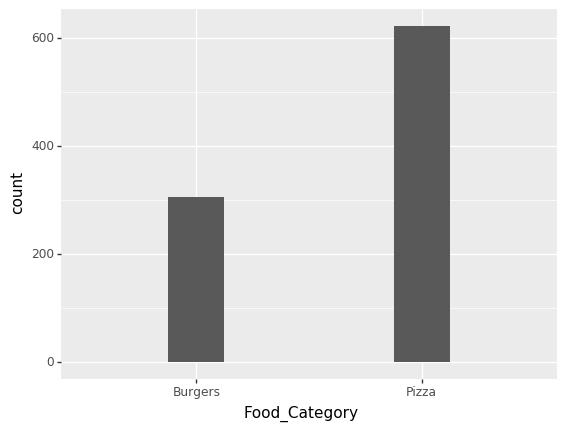

<ggplot: (7545786005)>

In [5]:
(ggplot(pizza, aes('Food_Category'))) + geom_histogram()

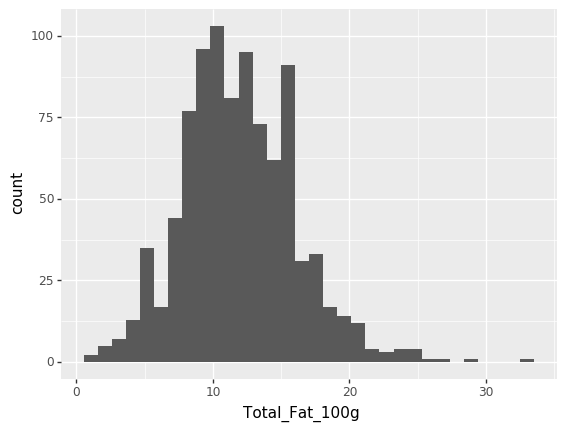

<ggplot: (7546313465)>

In [8]:
(ggplot(pizza, aes('Total_Fat_100g'))) + geom_histogram()

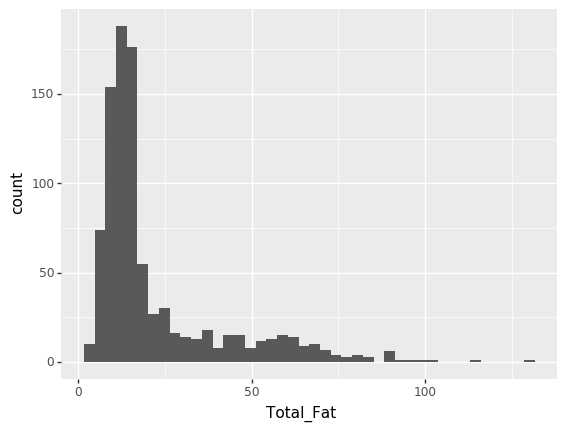

<ggplot: (7546715593)>

In [9]:
(ggplot(pizza, aes('Total_Fat'))) + geom_histogram()

In [89]:
pizza.columns

Index(['Item_Name', 'Item_Description', 'Food_Category', 'Calories',
       'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber', 'Calories_100g',
       'Total_Fat_100g', 'Saturated_Fat_100g', 'Trans_Fat_100g',
       'Cholesterol_100g', 'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g'],
      dtype='object')

In [101]:
predictors = ['Calories',
       'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber', 'Calories_100g',
       'Total_Fat_100g', 'Saturated_Fat_100g', 'Trans_Fat_100g',
       'Cholesterol_100g', 'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g']

X = pizza[predictors]
y = pizza["Food_Category"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#z score data
z = StandardScaler()
z.fit(X_train)
Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

# create model
knn = KNeighborsClassifier()

# choose potential values of k
ks = {"n_neighbors": range(1,20)}

# use grid search to find best parameters
grid = GridSearchCV(knn,ks, scoring = "accuracy", cv = 10)

knnmod = grid.fit(Xz_train, y_train)

### 1) Explain which variables you're using to predict the outcome.

I used all variables except 'Item_Name' and 'Item_Description' because it made the model score INCREDIBLY high. I ran the model multiple times, each time changing the variables, to test how the model would score. It scored best when including all but the 2. 

### 2) Explain which model validation technique you're using and why.

I am using k nearest neighbors (using grid search to find best hyper parameter) because it's a simple predictive model that can be used for classification. I decided to go with k fold cv because LOO is computationally expensive. 

### 3) Explain why you did or did not choose to standardize your continuous variables.

After figuring out which variables I wanted to use I ran the model with z scored and non z scored data and the knnmod.best_score_ rose by about 7% when I standardized my continuous variables.

### 4) Evaluate how the model performed. Explain.

My model did better than I expected. The best fit model scored a 97% and the out of sample prediction scored a 95%. However, I am a little suspicious of how well my model did. 

In [105]:
knnmod.best_estimator_.get_params()["n_neighbors"]

1

In [103]:
knnmod.best_score_

0.9710973084886128

In [104]:
knnmod.score(Xz_test,y_test)

0.953757225433526

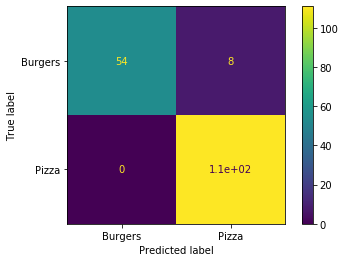

In [106]:
plot_confusion_matrix(knnmod,Xz_test,y_test)

## Model 2 – Decision Trees

### 0) Explore data (with ggplot)

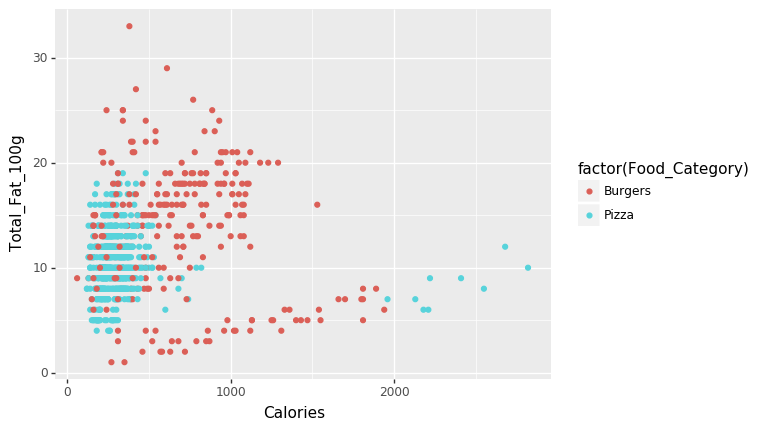

<ggplot: (7545485713)>

In [120]:
(ggplot(pizza, aes('Calories','Total_Fat_100g', color = 'factor(Food_Category)'))) + geom_point()

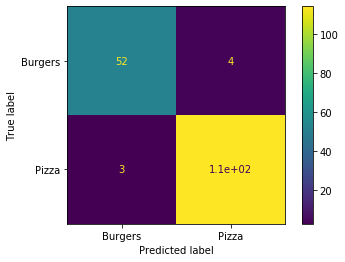

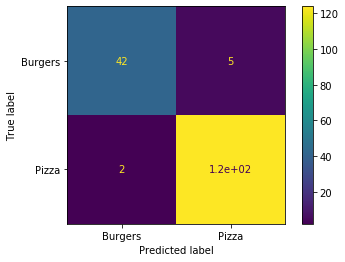

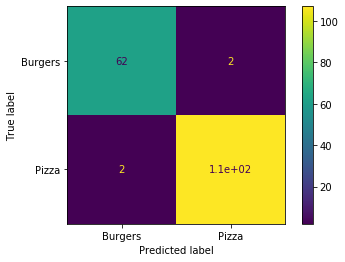

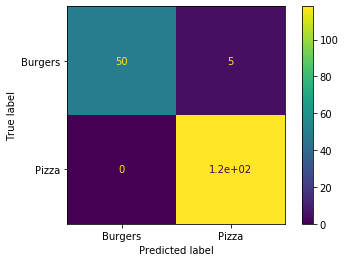

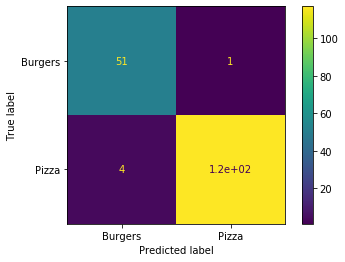

In [74]:
predictors = ['Calories','Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber', 'Calories_100g',
       'Total_Fat_100g', 'Saturated_Fat_100g', 'Trans_Fat_100g',
       'Cholesterol_100g', 'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g']

X = pizza[predictors]
y = pizza["Food_Category"]

kf = KFold(5, shuffle = True)

acc = []
depth = []
for train, test in kf.split(X):
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    z.fit(X_train)
    Xz_train = z.transform(X_train)
    Xz_test = z.transform(X_test)
    
    tree = DecisionTreeClassifier()
    tree.fit(Xz_train,y_train)

    acc.append(tree.score(Xz_test,y_test))
    depth.append(tree.get_depth())
    
    plot_confusion_matrix(tree,Xz_test,y_test)

### 1) Explain which variables you're using to predict the outcome.

I used all variables except 'Item_Name' and 'Item_Description' because it made the model score INCREDIBLY high. I ran the model multiple times, each time changing the variables, to test how the model would score. It scored best when including all but the 2. 

### 2) Explain which model validation technique you're using and why.

I used decision trees because you can use them with continuous variables. I decided to go with k fold cv because LOO is computationally expensive.

### 3) Explain why you did or did not choose to standardize your continuous variables.

After figuring out which variables I wanted to use I ran the model with z scored and non z scored data and the model did better when I standardized my continuous variables.

### 4) Evaluate how the model performed. Explain.

My model did very good. From the accuracy scores of the k fold models the mean is 97%. This means that my model is about 97% accurate when it comes to predicting whether a food is a burger or pizza.

In [76]:
print(acc)

[0.9595375722543352, 0.9595375722543352, 0.976878612716763, 0.9710982658959537, 0.9710982658959537]


In [77]:
print(np.mean(acc))

0.9676300578034681


In [78]:
print(depth)

[12, 13, 14, 13, 16]


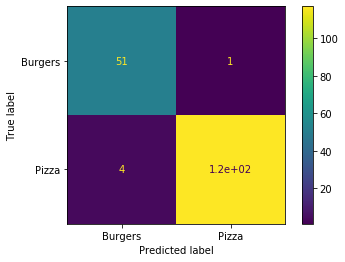

In [79]:
plot_confusion_matrix(tree,Xz_test,y_test)

## Model 3 – Logistic Regression

### 0) Explore data (with ggplot)

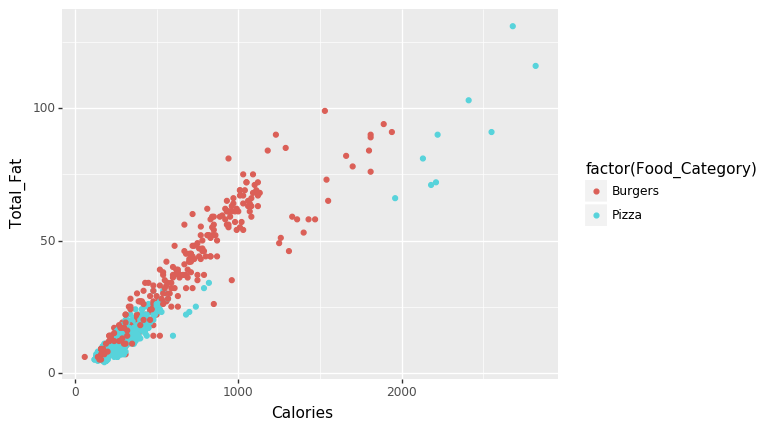

<ggplot: (7545493337)>

In [121]:
(ggplot(pizza, aes('Calories','Total_Fat', color = 'factor(Food_Category)'))) + geom_point()

In [68]:
predictors = ['Calories','Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber', 'Calories_100g',
       'Total_Fat_100g', 'Saturated_Fat_100g', 'Trans_Fat_100g',
       'Cholesterol_100g', 'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g']

X = pizza[predictors]
y = pizza["Food_Category"]


kf = KFold(n_splits = 5)
kf.split(X)

lr = LogisticRegression() 

acc = [] #empty list to store accuracy for each fold

matrix = []  #empty list to store confusion matrix of each fold


In [69]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    #standardize
    zscore = StandardScaler()
    zscore.fit(X_train)
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)
    
    # model
    model = lr.fit(Xz_train, y_train)
    
    # record accuracy
    acc.append(accuracy_score(y_test, model.predict(Xz_test)))
    
    # confusion matrix
    matrix.append(confusion_matrix(y_test, model.predict(Xz_test)))

### 1) Explain which variables you're using to predict the outcome.

I used all variables except 'Item_Name' and 'Item_Description' because it made the model score INCREDIBLY high. I ran the model multiple times, each time changing the variables, to test how the model would score. It scored best when including all but the 2. 

### 2) Explain which model validation technique you're using and why.

I used logistic regression because it is an appropriate model to use when predicting categorical data. I decided to go with k fold cv because LOO is computationally expensive.

### 3) Explain why you did or did not choose to standardize your continuous variables.

After figuring out which variables I wanted to use I ran the model with z scored and non z scored data and the model did better when I standardized my continuous variables.

### 4) Evaluate how the model performed. Explain.

My model did very good. From the accuracy scores of the k fold models the mean is 97%. This means that my model is about 97% accurate when it comes to predicting whether a food is a burger or pizza. 

In [22]:
print(acc)

[0.9653179190751445, 0.9710982658959537, 0.9826589595375722, 0.9710982658959537, 0.9710982658959537, 0.9710982658959537, 0.976878612716763, 0.9421965317919075, 0.9826589595375722, 0.9942196531791907]


In [23]:
print(np.mean(acc))

0.9728323699421966


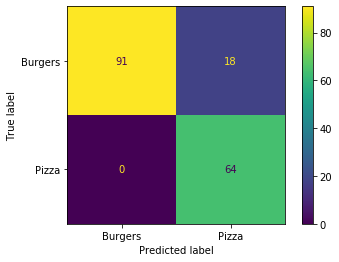

In [72]:
plot_confusion_matrix(lr,Xz_test,y_test)

In [71]:
print(matrix)

[array([[97, 15],
       [ 0, 61]]), array([[ 41,   6],
       [  9, 117]]), array([[  6,   0],
       [  1, 166]]), array([[  0,   0],
       [  1, 172]]), array([[91, 18],
       [ 0, 64]])]


## 5) Compare the performance of the 3 models using the accuracy, and the confusion matrix (consider things like how many it got correct, which errors it was most likely to make...etc).

Model 1 (KNN) scored an accuracy score of 97%, model 2 (decision tree) accuracy scores of the k fold models the mean is 97%, and model 3 (logistic regression) accuracy scores of the k fold models the mean is 97%. THere are many variables in all 3 models and I think that is why they performed so well. 

As for the confusion matrix, model 3 hdad the largest amount of false positives and model 2 had the largest amount of false negatives. All 3 models were more likely to make an error when predicting it was a pizza when it was actually a burger. 


# Part II

Use the dataset *KrispyKreme.csv* to build 2 clustering models (you can use any of the clustering models we've learned). 

For each model:

0. Explore data (with ggplot)
1. Explain which variables you're using to predict the outcome. 
2. Evaluate how the model performed using sihouette scores. Look at different numbers of cluseters (like k = 3,5..etc). Which number of clusters is the best fit?
3. Describe the clusters (what are they like? how are they different)

At the end: 

4. Compare the clusters obtained by the two models. Overall are they similar? or really different (i.e. do they contain mostly the same members?)


## I droppped some columns in the KrispyKreme dataset that had many NAs

In [2]:
donut = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")

donut = donut.drop("Serving_Size_text",axis = 1)
donut = donut.drop("Serving_Size_household",axis = 1)
donut = donut.drop('Potassium_100g',axis = 1)
donut = donut.drop('Potassium',axis = 1)
donut = donut.dropna()

donut = donut.reset_index()

donut.head()

,index,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_Unit,Calories,...,Calories_100g,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,g,350,...,350,19,9,0,0,110,42,4,26,1.0
1,2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,g,300,...,353,18,8,0,0,165,44,5,20,1.0
2,5,Krispy Kreme Football Doughnut,Krispy Kreme,49,Football Doughnut,"Football Doughnut, Doughnuts",Baked Goods,71,g,310,...,437,23,10,0,0,197,49,10,23,4.0
3,6,Krispy Kreme Chocolate Iced w/ Kreme Filling,Krispy Kreme,49,Chocolate Iced w/ Kreme Filling,"Chocolate Iced w/ Kreme Filling, Doughnuts",Baked Goods,85,g,350,...,412,22,11,0,0,165,48,5,27,1.0
4,8,Krispy Kreme Chocolate Iced Raspberry Filled D...,Krispy Kreme,49,Chocolate Iced Raspberry Filled Doughnut,Chocolate Iced Raspberry Filled Doughnut w/ Tw...,Baked Goods,88,g,310,...,352,17,8,0,0,159,47,5,25,1.0


In [3]:
donut.shape

(174, 29)

## Model 1 – K Means

### 0) Explore data (with ggplot)

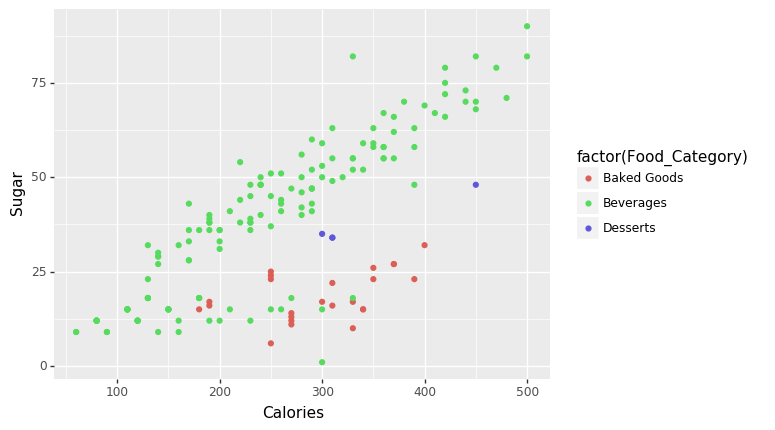

<ggplot: (7547604505)>

In [79]:
(ggplot(donut, aes('Calories','Sugar', color = 'factor(Food_Category)'))) + geom_point()

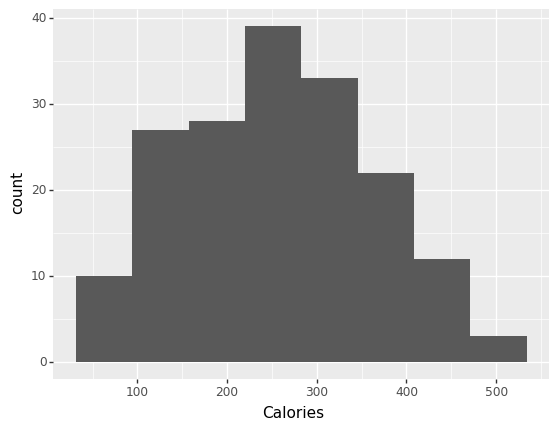

<ggplot: (7547580341)>

In [87]:
(ggplot(donut, aes('Calories'))) + geom_histogram()

In [88]:
donut.columns

Index(['index', 'Restaurant_Item_Name', 'restaurant', 'Restaurant_ID',
       'Item_Name', 'Item_Description', 'Food_Category', 'Serving_Size',
       'Serving_Size_Unit', 'Calories', 'Total_Fat', 'Saturated_Fat',
       'Trans_Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein',
       'Sugar', 'Dietary_Fiber', 'Calories_100g', 'Total_Fat_100g',
       'Saturated_Fat_100g', 'Trans_Fat_100g', 'Cholesterol_100g',
       'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g', 'Sugar_100g',
       'Dietary_Fiber_100g'],
      dtype='object')

In [48]:
features = ['Restaurant_ID','Serving_Size','Calories', 'Total_Fat', 'Saturated_Fat',
       'Trans_Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein',
       'Sugar', 'Dietary_Fiber', 'Calories_100g', 'Total_Fat_100g',
       'Saturated_Fat_100g', 'Trans_Fat_100g', 'Cholesterol_100g',
       'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g', 'Sugar_100g',
       'Dietary_Fiber_100g']

X = donut[features]

#no z score because it scored higher without

num_k = [2]
sil_score = {}

for k in num_k:
    km = KMeans(n_clusters = k)
    km.fit(X)
    membership = km.predict(X)
    XALL = X
    XALL["clust"] = membership
    sil_score[k] = silhouette_score(X, membership)
    
print(sil_score)

{2: 0.5960680542952679}


### 1) Explain which variables you're using to predict the outcome.

I used all of the variables except for 'index', 'Restaurant_Item_Name', 'restaurant', 'Item_Name', 'Item_Description', 'Food_Category', and 'Serving_Size_Unit' because they're qualitative and just not necessary. 

### 2) Evaluate how the model performed using silhouette scores. Look at different numbers of cluseters (like k = 3,5..etc). Which number of clusters is the best fit?


I tried clusters of 2 through 5 and the number of clusters that fit the best is 2. It scored a silhouette score of 59.6%

{2: 0.5960680542952679, 3: 0.45346163041796134, 4: 0.4043417914516611, 5: 0.41149175279515054}

### 3) Describe the clusters (what are they like? how are they different)

Cluster 1 has a lot more data points than cluster 0. From the scatter plots below you can see that cluster 0 contains a lot of products that are pretty low in sugar but high in total fat compared to cluster 1. The boxplot shows that cluster 0 has a bigger spread when it comes to calories. 

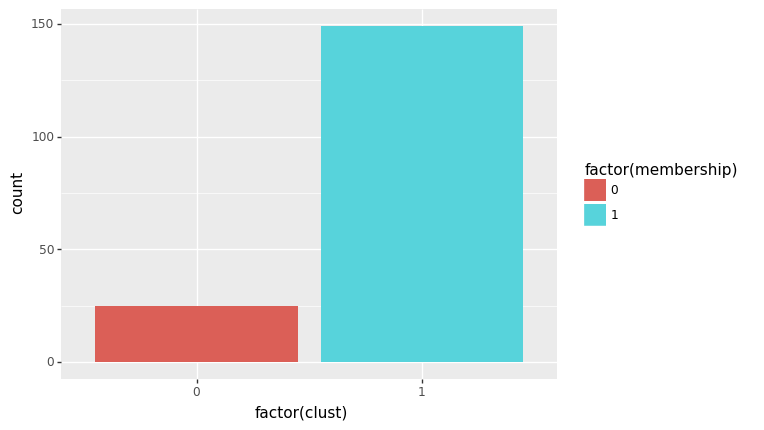

<ggplot: (7554838701)>

In [50]:
(ggplot(XALL, aes(x = "factor(clust)", fill = "factor(membership)"))) + geom_bar()

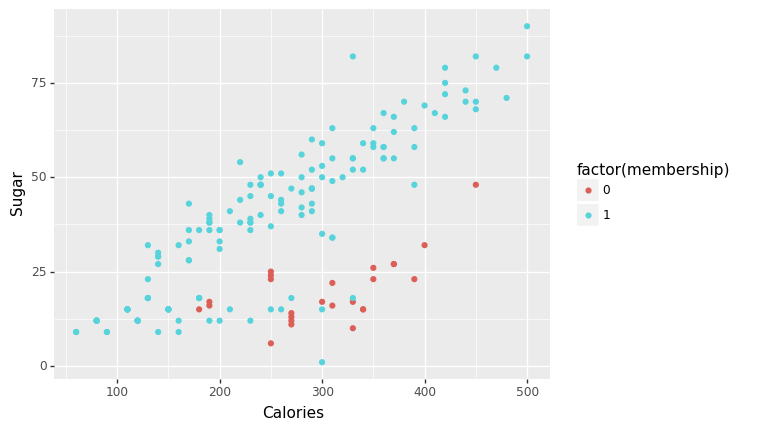

<ggplot: (7554556497)>

In [49]:
(ggplot(XALL, aes(x = "Calories", y = "Sugar", color = "factor(membership)")) + geom_point())

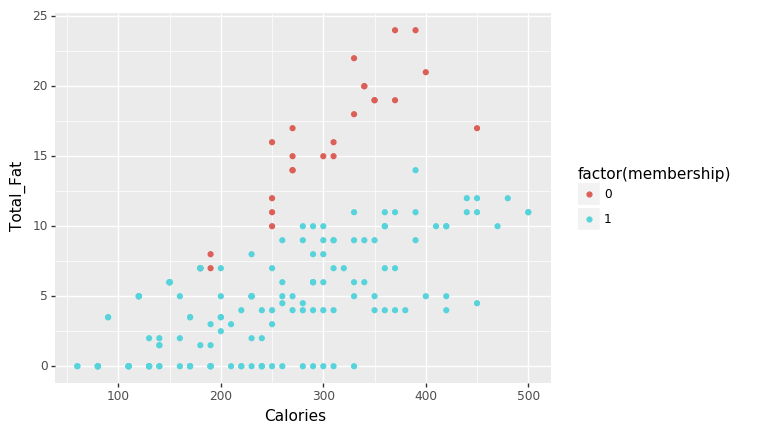

<ggplot: (7552949845)>

In [60]:
(ggplot(XALL, aes(x = "Calories", y = "Total_Fat", color = "factor(membership)")) + geom_point())

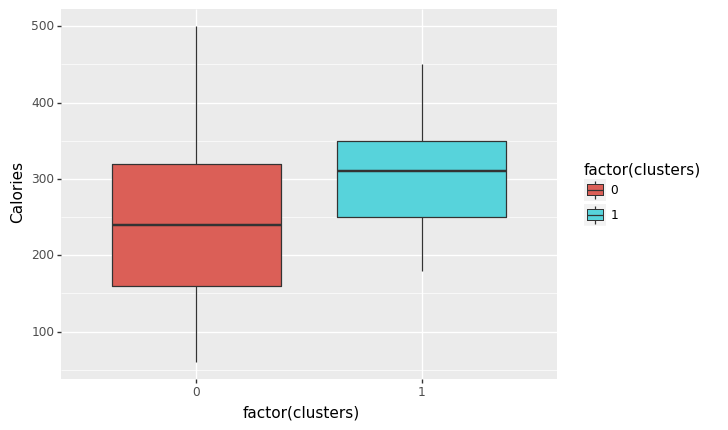

<ggplot: (7554555117)>

In [52]:
(ggplot(XALL, aes(x = "factor(clusters)", y = "Calories")) + geom_boxplot(aes(fill = "factor(clusters)")))

## Model 2 – GM

### 0) Explore data (with ggplot)

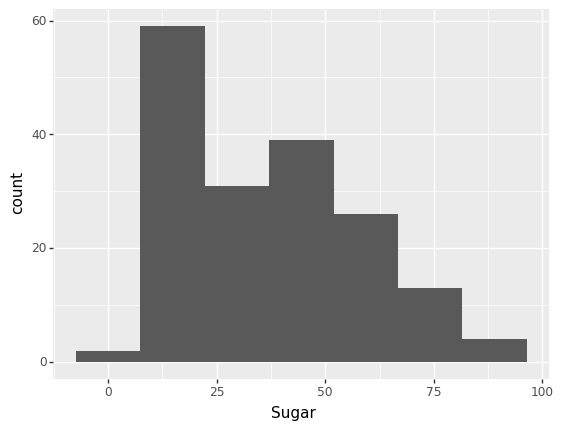

<ggplot: (7550102361)>

In [111]:
(ggplot(donut, aes('Sugar'))) + geom_histogram()

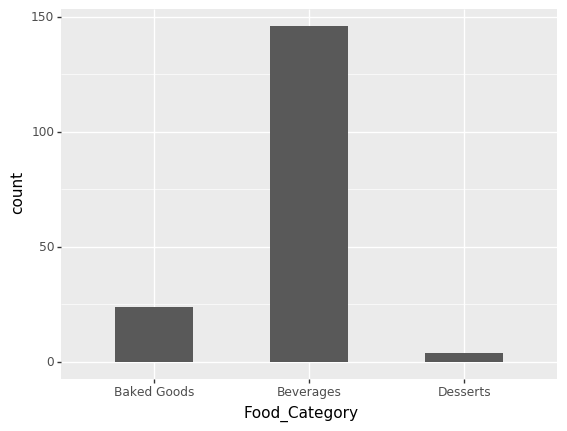

<ggplot: (7548987373)>

In [126]:
(ggplot(donut, aes('Food_Category'))) + geom_histogram(binwidth=.5)

In [53]:
features = ['Restaurant_ID','Serving_Size','Calories', 'Total_Fat', 'Saturated_Fat',
       'Trans_Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Protein',
       'Sugar', 'Dietary_Fiber', 'Calories_100g', 'Total_Fat_100g',
       'Saturated_Fat_100g', 'Trans_Fat_100g', 'Cholesterol_100g',
       'Sodium_100g', 'Carbohydrates_100g', 'Protein_100g', 'Sugar_100g',
       'Dietary_Fiber_100g']

X = donut[features]

n_components = [2]
sils = {}

for n in n_components:
    gmm = GaussianMixture(n_components = n)
    
    gmm.fit(X)
    membership = km.predict(X)
    Xdf = X
    Xdf["clust"] = clusters
    sil_score[k] = silhouette_score(X, clusters)
    
    
    sils[n] = silhouette_score(X, clusters)
    
print(sils)

{2: 0.5960680542952679}


### 1) Explain which variables you're using to predict the outcome.

I used all of the variables except for 'index', 'Restaurant_Item_Name', 'restaurant', 'Item_Name', 'Item_Description', 'Food_Category', and 'Serving_Size_Unit' because they're qualitative and just not necessary. 

### 2) Evaluate how the model performed using silhouette scores. Look at different numbers of cluseters (like k = 3,5..etc). Which number of clusters is the best fit?


I tried clusters of 2 through 5 and the number of clusters that fit the best is 2. It scored a silhouette score of 59.6%. I am suspicous and confused as to how my GM model of 2 clusters scored the same silhouette score as my k means model of 2 clusters. 

{2: 0.5960680542952679, 3: 0.39920606824182314, 4: 0.33943570922222954, 5: 0.3506574311697758}

### 3) Describe the clusters (what are they like? how are they different)

Cluster 0 has a lot more data points than cluster 1. From the scatter plots below you can see that cluster 1 contains a lot of products that are pretty low in sugar and low in total fat compared to cluster 0. The boxplot shows that cluster 0 has a bigger spread when it comes to calories. 

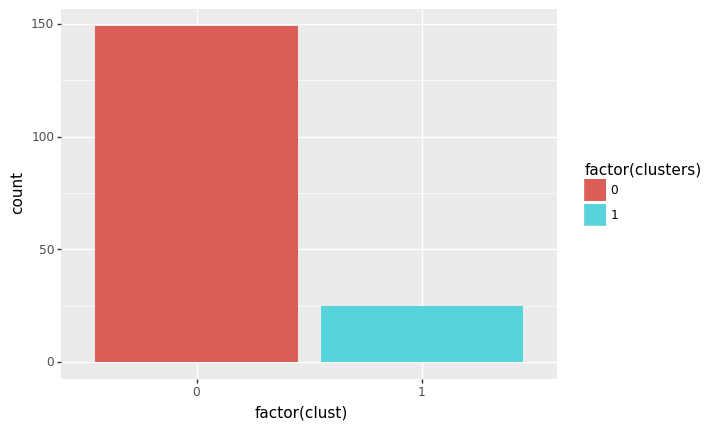

<ggplot: (7553296633)>

In [55]:
(ggplot(Xdf, aes(x = "factor(clust)", fill = "factor(clusters)"))) + geom_bar()

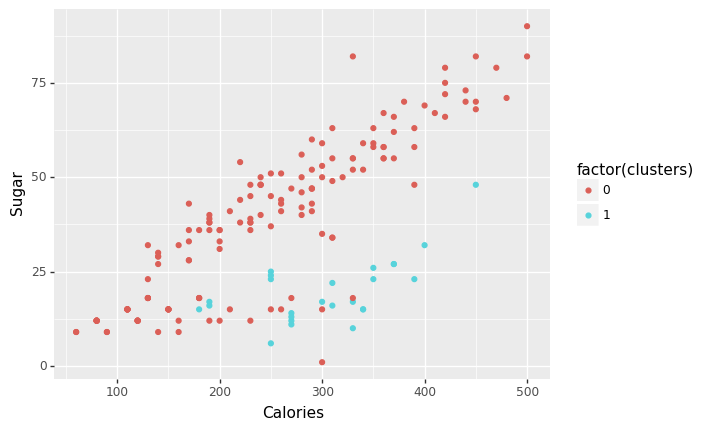

<ggplot: (7554693637)>

In [54]:
(ggplot(Xdf, aes(x = "Calories", y = "Sugar", color = "factor(clusters)")) + geom_point())

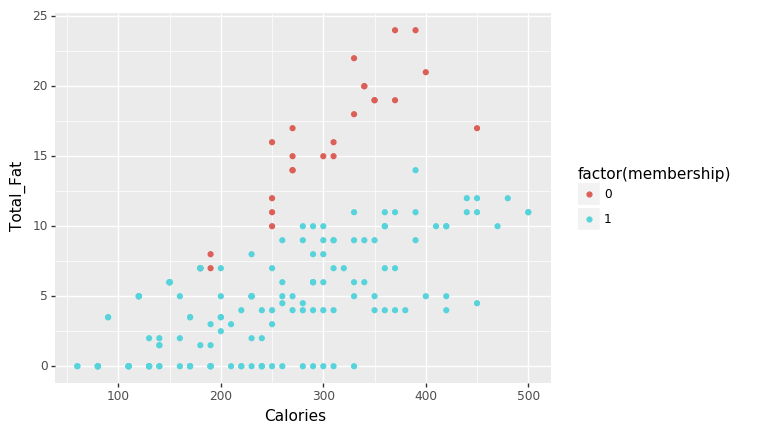

<ggplot: (7553302345)>

In [63]:
(ggplot(Xdf,aes(x = "Calories", y = "Total_Fat", color = "factor(membership)")) + geom_point())

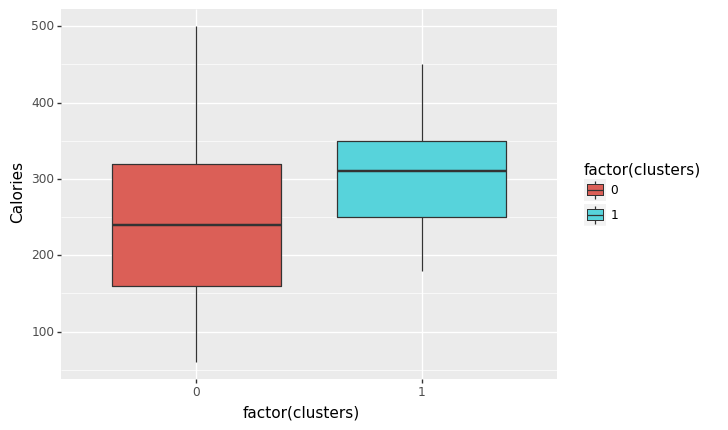

<ggplot: (7554842253)>

In [56]:
(ggplot(Xdf, aes(x = "factor(clusters)", y = "Calories")) + geom_boxplot(aes(fill = "factor(clusters)")))

## 4) Compare the clusters obtained by the two models. Overall are they similar? or really different (i.e. do they contain mostly the same members?)

The clusters from k means and GM are kind of similar. They are only similar in the fact that both of their cluster 0 has a bigger spread in calories and is low in total fat. The size of Cluster 0 in k means is much smaller and higher in sugar than cluster 0 in GM. 